In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [8]:
# 数据生成
x = np.arange(0, 1, 0.002)
y = norm.rvs(0, size=500, scale=0.1)
y = y + x**2

In [9]:
# Calculate mean square error
def rmse(y_test ,y):
    return sp.sqrt(sp.mean(y_test - y)**2)

In [10]:
# Calculate r square
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum()/((y_true - y_true.mean())**2).sum()

In [11]:
# 另一个版本的 r square
def R22(y_test, y_true):
    y_mean = np.array(y_true)
    y_mean[:] = y_mean.mean()
    return 1 - rmse(y_test, y_true)/rmse(y_mean, y_true)

In [12]:
?plt.scatter

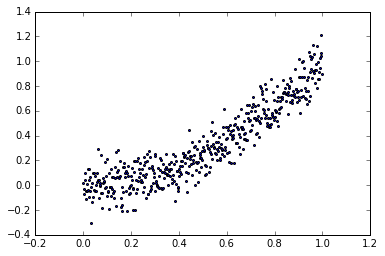

In [17]:
plt.scatter(x, y, s=4)

In [15]:
degree = [1,2,100]
y_test = []
y_test = np.array(y_test)

[-0.16878117  0.99810792]
rmse=0.00, R2=0.83, R22=-16.50, clf.score=0.83
[  8.14653312e-05  -1.91368796e-02   1.01928337e+00]
rmse=0.00, R2=0.89, R22=-0.17, clf.score=0.89
[ -3.43619033e-02   1.88265764e+01  -2.48583069e+03   1.30688973e+05
  -3.63160795e+06   6.16247788e+07  -6.92237846e+08   5.40050697e+09
  -3.00786789e+10   1.20994708e+11  -3.49775748e+11   7.05523048e+11
  -9.12813197e+11   5.55644329e+11   2.35589206e+11  -5.32396543e+11
  -5.45125255e+10   4.11108093e+11   1.11346304e+11  -2.99654887e+11
  -2.25352349e+11   1.28481289e+11   2.96518520e+11   7.29489700e+10
  -1.88360485e+11  -2.24488003e+11  -6.57203269e+10   1.70909942e+11
   2.01969523e+11   1.26002492e+11  -6.71539401e+10  -1.93690985e+11
  -2.31101662e+11  -7.39093552e+10   7.81098880e+10   2.22918502e+11
   2.43784234e+11   1.32472007e+11  -2.80785287e+10  -1.70724653e+11
  -2.72123610e+11  -2.25179959e+11  -1.22346551e+11   2.03314726e+10
   1.73517940e+11   2.85888822e+11   2.87094722e+11   1.92430763e+11


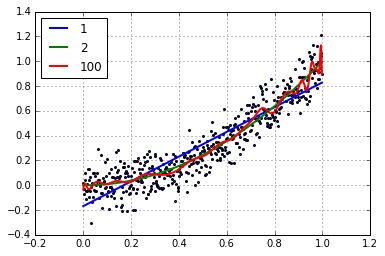

In [21]:
for d in degree:  
    clf = Pipeline([('poly', PolynomialFeatures(degree=d)),  
                    ('linear', LinearRegression(fit_intercept=False))])  
    clf.fit(x[:, np.newaxis], y)  
    y_test = clf.predict(x[:, np.newaxis])  
  
    print(clf.named_steps['linear'].coef_)  
    print('rmse=%.2f, R2=%.2f, R22=%.2f, clf.score=%.2f' %  
      (rmse(y_test, y),  
       R2(y_test, y),  
       R22(y_test, y),  
       clf.score(x[:, np.newaxis], y)))      
      
    plt.plot(x, y_test, linewidth=2)  
plt.scatter(x, y, s=4)
plt.grid()  
plt.legend(['1','2','100'], loc='upper left')  
plt.show() 

[ 0.          0.77768787]
rmse=0.00, R2=0.71, R22=-inf, clf.score=0.71
[ 0.          0.26168177  0.67693489]
rmse=0.00, R2=0.77, R22=-inf, clf.score=0.77
[  0.00000000e+00   2.50578460e-01   3.27861129e-01   2.69144243e-01
   1.88813215e-01   1.21871623e-01   7.36612744e-02   4.12528472e-02
   2.04098122e-02   7.51445076e-03  -1.10688734e-04  -4.32995110e-03
  -6.40092164e-03  -7.15520817e-03  -7.13420515e-03  -6.68489100e-03
  -6.02546150e-03  -5.28961752e-03  -4.55618815e-03  -3.86882318e-03
  -3.24900933e-03  -2.70461635e-03  -2.23545903e-03  -1.83687354e-03
  -1.50197802e-03  -1.22306646e-03  -9.92436677e-04  -8.02852995e-04
  -6.47777231e-04  -5.21456260e-04  -4.18923999e-04  -3.35955296e-04
  -2.68995576e-04  -2.15081084e-04  -1.71758597e-04  -1.37009646e-04
  -1.09181795e-04  -8.69280073e-05  -6.91541854e-05  -5.49744529e-05
  -4.36734738e-05  -3.46749905e-05  -2.75157493e-05  -2.18240244e-05
  -1.73020198e-05  -1.37115110e-05  -1.08621744e-05  -8.60213197e-06
  -6.81031052e-06 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars


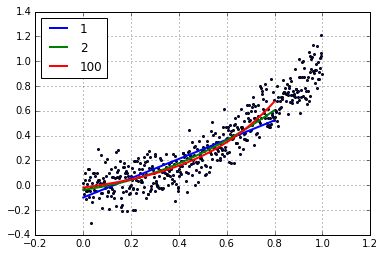

In [28]:
# Ridge regression to avoid overfitting
for d in degree:  
    clf = Pipeline([('poly', PolynomialFeatures(degree=d)),  
                    ('linear', linear_model.Ridge())])  
    clf.fit(x[:400, np.newaxis], y[:400])  
    y_test = clf.predict(x[:400, np.newaxis])  
  
    print(clf.named_steps['linear'].coef_)  
    print('rmse=%.2f, R2=%.2f, R22=%.2f, clf.score=%.2f' %  
      (rmse(y_test, y[:400]),  
       R2(y_test, y[:400]),  
       R22(y_test, y[:400]),  
       clf.score(x[:400, np.newaxis], y[:400])))
       
    plt.plot(x[:400,], y_test, linewidth=2)  
plt.scatter(x, y, s=4)
plt.grid()  
plt.legend(['1','2','100'], loc='upper left')  
plt.show() 